In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', None)

## Import Dataset
    Read data set using Pandas read_excel

In [3]:
df=pd.read_excel("Data_Train.xlsx")

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Step1: Handling Missing Values
From dataframe info we see that,we have all categorical dataset except Price feature.Also there are zero missing values except for 'Route' & 'Total_Stops' with single null entries, we shall drop this row.

In [6]:
df.shape

(10683, 11)

In [7]:
df.dropna(axis=0,how='any',inplace=True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## Feature Engineering: 
Lets deal with Date and duration columns now.
Flight price should vary based on the day of journey,weekday or weekend travel,early month or later dates,travel month & so on. Lets extract these new features from Date_of_journey column

In [10]:
# Convert DateofJourney from Object to Datatime dtype, exracting day,month & weekday of travel
df['Day_of_Journey']=pd.to_datetime(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=pd.to_datetime(df['Date_of_Journey']).dt.month
df['Weekday_of_Journey']=pd.to_datetime(df['Date_of_Journey']).dt.dayofweek


In [11]:
# lets check Price varation againts day, month and week day

<AxesSubplot:xlabel='Day_of_Journey', ylabel='Price'>

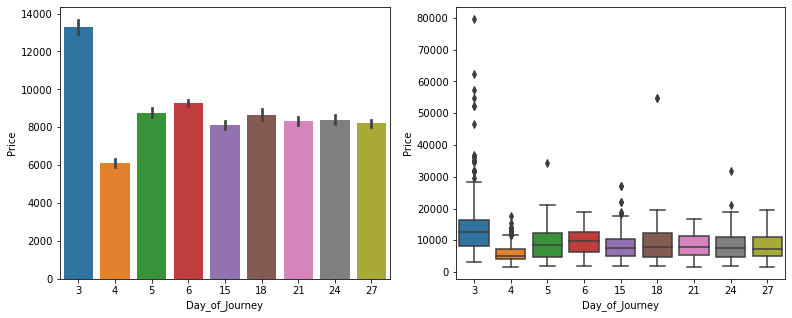

In [12]:
fig,ax= plt.subplots(1,2, figsize=(13,5))
sns.barplot(x='Day_of_Journey',y='Price',data=df,ax=ax[0])
sns.boxplot(x='Day_of_Journey',y='Price',data=df,ax=ax[1])

In [13]:
# It is apparent that early dates of travel are highly priced

<AxesSubplot:xlabel='Month_of_Journey', ylabel='Price'>

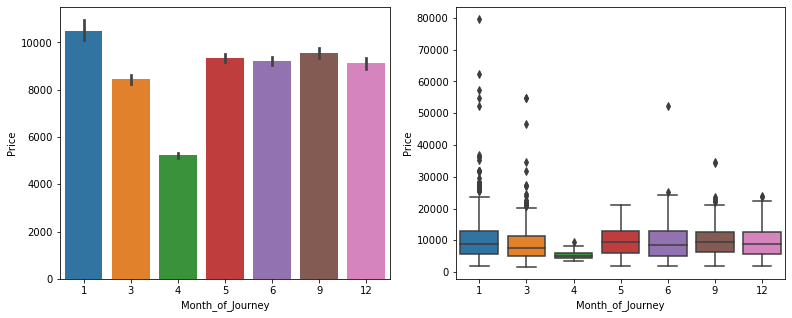

In [14]:
fig,ax= plt.subplots(1,2, figsize=(13,5))
sns.barplot(x='Month_of_Journey',y='Price',data=df,ax=ax[0])
sns.boxplot(x='Month_of_Journey',y='Price',data=df,ax=ax[1])


<AxesSubplot:xlabel='Weekday_of_Journey', ylabel='Price'>

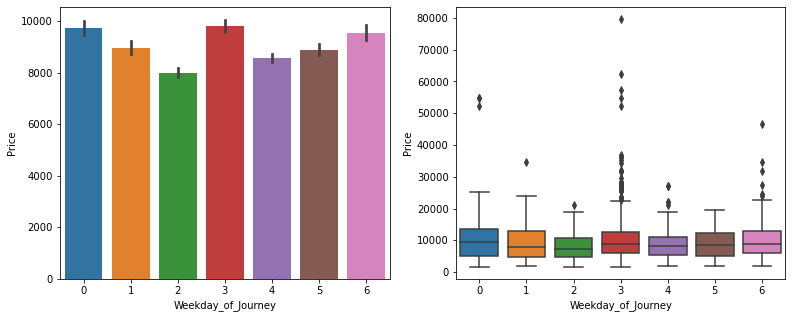

In [15]:
fig,ax= plt.subplots(1,2, figsize=(13,5))
sns.barplot(x='Weekday_of_Journey',y='Price',data=df,ax=ax[0])
sns.boxplot(x='Weekday_of_Journey',y='Price',data=df,ax=ax[1])

In [16]:
#Now we shall drop the'Date_of_Journey'column
df.drop(['Date_of_Journey'],axis=1,inplace=True)

#### Lets take care of Dep_Time & Arrival Time. 
     We shall braodly classify travel based on part of the day in these two fields

In [17]:
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Arr_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour

def part_of_day(hr):
    if (hr>=0) & (hr<=4):
        return'Latenight'
    elif (hr>4) & (hr<=8):
        return'Early Morning'
    elif (hr>8) & (hr<12):
        return'Morning'
    elif (hr>=12) & (hr<=16):
        return'Noon'
    elif (hr>16) & (hr<=20):
        return'Evening'
    elif (hr>20):
        return 'Night'
     
    

In [18]:
df['Dep_partofday']=df['Dep_hr'].apply(part_of_day)
df['Arrival_partofday']=df['Arr_hr'].apply(part_of_day)

In [19]:
df.drop(['Arrival_Time','Arr_hr'],axis=1, inplace=True) 
df.drop(['Dep_Time','Dep_hr'], axis=1, inplace=True)

df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Weekday_of_Journey', 'Dep_partofday', 'Arrival_partofday'],
      dtype='object')

#### Lets us convert Duration into minutes.

In [20]:

df['Duration_mins']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [21]:
df['Duration_mins'].head()

0     170
1     445
2    1140
3     325
4     285
Name: Duration_mins, dtype: int64

In [22]:
df.drop('Duration',axis=1,inplace=True)

In [23]:
# Plot travel duration to see how price vary based on it.

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration_mins', ylabel='Price'>

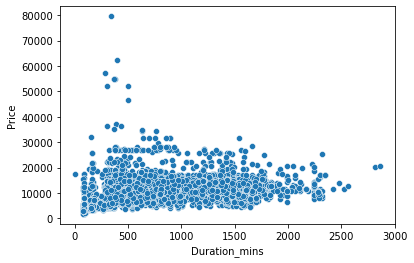

In [24]:
sns.scatterplot(df['Duration_mins'],df['Price'])

In [25]:
# Travel duration doesnt seem to affect Price much

#### Lets represent Total Stops as numeric values

In [26]:
# Assign numerical values to Total Stops
df['Total_Stops']=df['Total_Stops'].replace({'non-stop': 0,'1 stop'  : 1,'2 stops' : 2,'3 stops' : 3,
                                                   '4 stops' : 4})


####  Route feature 
    Since we are capturng total stops, will drop the route feature

In [27]:
#df['Route_mean_enc']= df['Route'].replace(dict(df.groupby(['Route'])['Price'].mean()))


In [28]:
#df['Route_mean_enc'].unique()

In [29]:
df.drop('Route',axis=1,inplace=True)

In [30]:
# Lets plot price variation against total stops variables


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

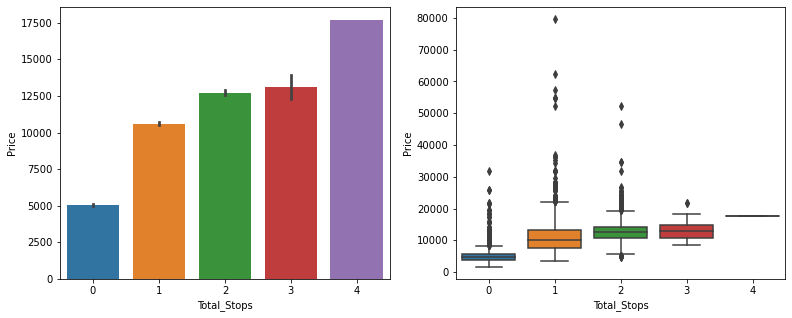

In [31]:
fig, axes = plt.subplots(1, 2,figsize=(13,5))
sns.barplot(df['Total_Stops'],df['Price'], ax =axes[0])
sns.boxplot(df['Total_Stops'],df['Price'], ax =axes[1])

#### Additional Info field has variations of price like those wth Business class have higher prices,
     Lets plot the same & see the price variation, post that lets go with mean encoding

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

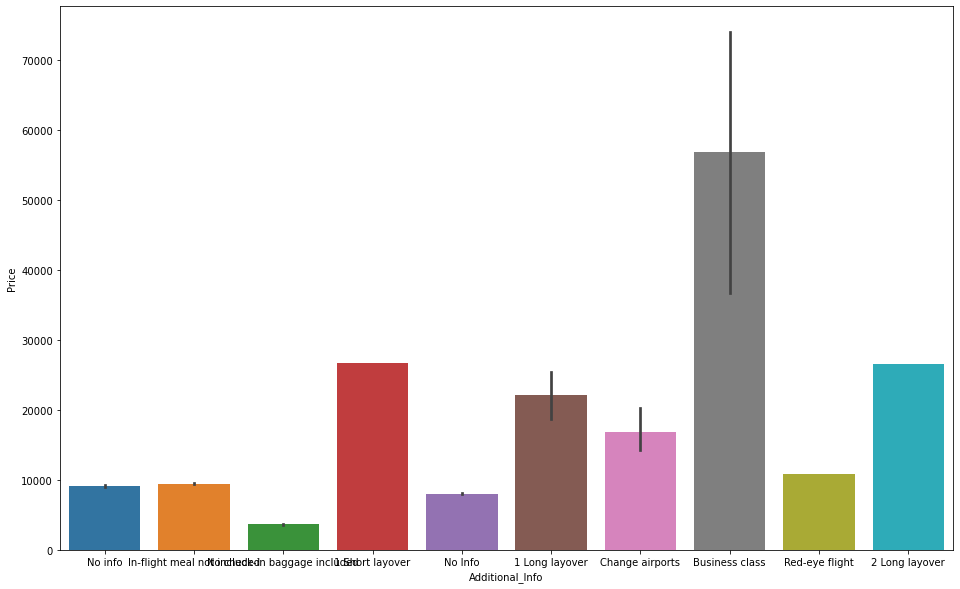

In [32]:
#df['Additional_Info'].unique()
fig, ax = plt.subplots(figsize=(16,10))

sns.barplot(df['Additional_Info'],df['Price'],ax=ax)

In [33]:
df.groupby(['Additional_Info'])['Price'].agg(['count','mean']).sort_values(by=['mean'],ascending=False)

,count,mean
Additional_Info,,
Business class,4,56811.250000
1 Short layover,1,26743.000000
2 Long layover,1,26480.000000
1 Long layover,19,22109.631579
Change airports,7,16800.714286
Red-eye flight,1,10873.000000
In-flight meal not included,1982,9471.834511
No info,8344,9141.519295
No Info,3,8044.666667


#### Let us check Price variation againt source,destination & Airline features


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='Price'>

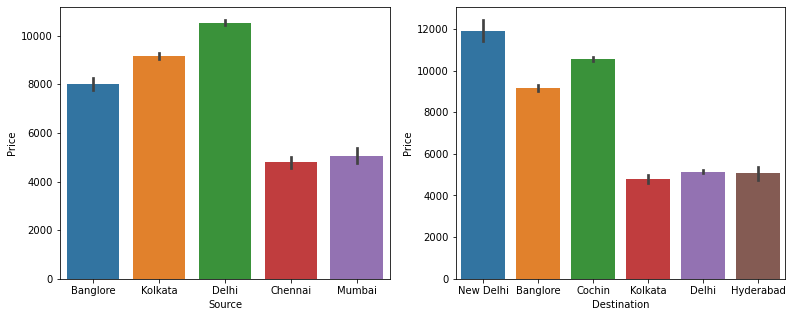

In [34]:
f, ax = plt.subplots(1,2,figsize=(13,5))
sns.barplot('Source', 'Price',data=df,ax=ax[0])
sns.barplot(df['Destination'], df['Price'], ax=ax[1])


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Airline', ylabel='Price'>

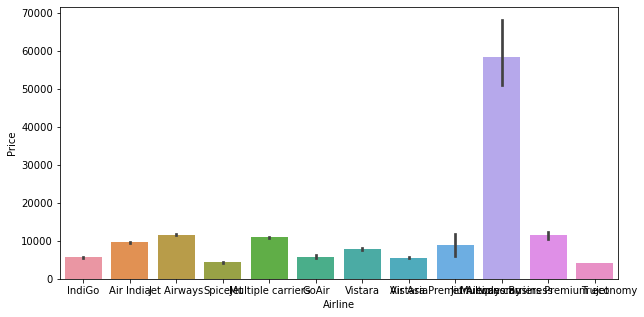

In [35]:
f, ax = plt.subplots(figsize=(10,5))
sns.barplot(df['Airline'],df['Price'])

### Feature Encoding
     Lets one hot encode Airline, Source & Destination.
     We shall mean encoding for parts of days & Additional Info Features as variation with price is captured best this way.

In [36]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Dep_partofday,Arrival_partofday,Duration_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,6,Night,Latenight,170
1,Air India,Kolkata,Banglore,2,No info,7662,5,1,5,Early Morning,Noon,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,6,9,4,Morning,Latenight,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,12,3,Evening,Night,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,3,1,3,Noon,Night,285


In [37]:
#df['Additional_Info'].unique()

In [38]:
df= pd.get_dummies(data=df,columns=['Airline','Source','Destination'],drop_first= True)

In [39]:
#Mean encode Additonal info
Additional_Info =df.groupby(['Additional_Info'])['Price'].mean().to_dict()
df['Additional_Info']= df['Additional_Info'].map(Additional_Info)

In [40]:
def get_addinfo_mean_encode(x):
    return Additional_Info.get(x)

In [41]:
#df['Dep_partofday']= df['Dep_partofday'].replace(dict(df.groupby(['Dep_partofday'])['Price'].mean()))
Dep_partofday =df.groupby(['Dep_partofday'])['Price'].mean().to_dict()
df['Dep_partofday']= df['Dep_partofday'].map(Dep_partofday)


In [42]:
def get_dep_mean_encode(x):
    return Dep_partofday.get(x)

In [43]:
#df['Arrival_partofday']= df['Arrival_partofday'].replace(dict(df.groupby(['Arrival_partofday'])['Price'].mean()))
Arrival_partofday =df.groupby(['Arrival_partofday'])['Price'].mean().to_dict()
df['Arrival_partofday']= df['Arrival_partofday'].map(Arrival_partofday)

In [44]:
def get_arr_mean_encode(x):
    return Arrival_partofday.get(x)

In [45]:
#df.columns

In [46]:
Y= df['Price']
X=df.drop('Price',axis=1)
X.head()

,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Dep_partofday,Arrival_partofday,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,9141.519295,24,3,6,8391.050962,9470.926171,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,9141.519295,5,1,5,9095.911806,8787.037524,445,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9141.519295,6,9,4,9353.964057,9470.926171,1140,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,9141.519295,5,12,3,9178.833263,8357.841417,325,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,9141.519295,3,1,3,9392.816658,8357.841417,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Feature Scaling

In [47]:
from sklearn.preprocessing  import MinMaxScaler

In [48]:
scale = MinMaxScaler()

In [49]:
X[X.columns] = scale.fit_transform(X)

In [50]:

X.head()

,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Dep_partofday,Arrival_partofday,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.00,0.103381,0.875000,0.181818,1.000000,0.406030,0.620117,0.057793,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.50,0.103381,0.083333,0.000000,0.833333,0.823958,0.243275,0.154116,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.103381,0.125000,0.727273,0.666667,0.976963,0.620117,0.397548,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.25,0.103381,0.083333,1.000000,0.500000,0.873124,0.006776,0.112084,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.25,0.103381,0.000000,0.000000,0.500000,1.000000,0.006776,0.098074,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Feature importance
Lets check feature importance using mutual info

In [51]:
from sklearn.feature_selection import mutual_info_classif

In [52]:
featureimp =pd.DataFrame(mutual_info_classif(X,Y),index=X.columns)

<AxesSubplot:>

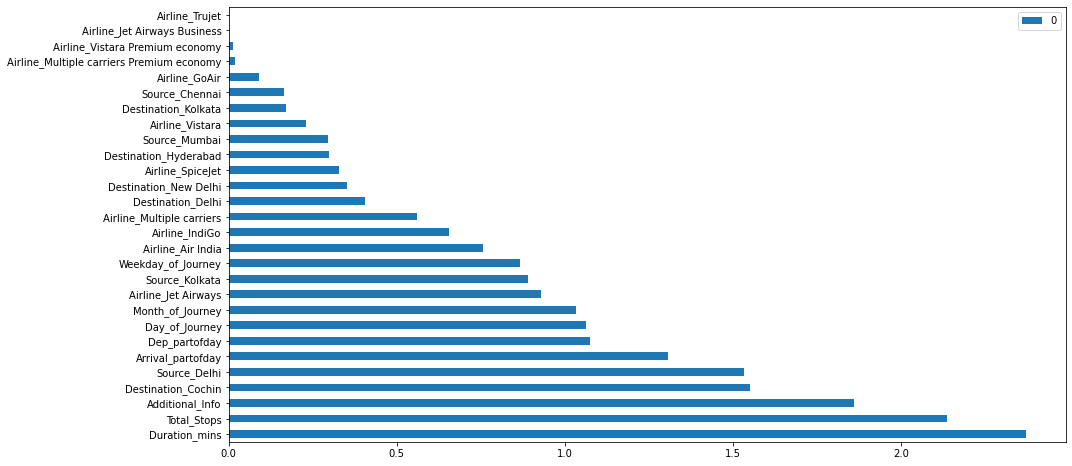

In [53]:
featureimp.sort_values(by=0,ascending=False).plot(kind='barh',figsize=(15,8))

### Modelling
Lets see how various models perform & choose the best one

In [54]:
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.neighbors import KNeighborsRegressor
#from xgboost import XGBRegressor

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size=0.30)

In [56]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# model.fit(x_train,y_train)
    
    # score for train data
   # train_pred= model.predict(x_train)
    #print("Model Name is  :{}".format(model))
    
    #print("R2 score for train data is  :{}".format(round(model.score(x_train,y_train),2)))
    #print("Mean Sq Error for train data is  :{}".format(round(mean_squared_error(y_train,train_pred),2)))
    #print("Mean Abs Error for test data is  :{}".format(round(mean_absolute_error(y_train,train_pred),2)))
    #print("Root Mean Sq Error for test data is  :{}".format(np.sqrt(round(mean_squared_error(y_train,train_pred),2)))) 
        
        
    # score for test data
    #test_pred= model.predict(x_test)
    #print('\t')
    #print("R2 score for test data is  :{}".format(round(r2_score(y_test,test_pred),2)))
    #print("Mean Sq Error for test data is  :{}".format(round(mean_squared_error(y_test,test_pred),2)))
    #print("Mean Abs Error for test data is  :{}".format(round(mean_absolute_error(y_test,test_pred),2)))
    #print("Root Mean Sq Error for test data is  :{}".format(np.sqrt(round(mean_squared_error(y_test,test_pred),2))))
    #print('\t')                                                                                       
    

In [57]:
#model_predict(LinearRegression())
#model_predict(Lasso())
#model_predict(Ridge())
#model_predict(DecisionTreeRegressor())
#model_predict(GradientBoostingRegressor())
#model_predict(RandomForestRegressor())
#model_predict(KNeighborsRegressor())
#model_predict(XGBRegressor())

In [58]:
## Random Forest is giving the best results so lets go ahead with hyperparameter tuning the same

In [59]:
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import KFold


In [60]:
#randomFR = RandomForestRegressor()

#n_estimators=[int(x) for x in np.linspace(start=100,stop=1200, num=12 )]
#max_depth=[int(x) for x in np.linspace(5, 30, num = 6)]
#min_samples_split=[2, 5, 10, 15, 100]
#min_samples_leaf=[1, 2, 5, 10]
#min_weight_fraction_leaf=0.0,
#max_features=['auto', 'sqrt']
#oob_score= True
    

In [61]:
# Create the random grid

#random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               #'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf}

In [62]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
#rf_random = RandomizedSearchCV(estimator = randomFR, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [63]:
#rf_random.fit(x_train,y_train)

In [64]:
#rf_random.best_params_


We see Random forest gave best results and we got our best hyperparameters for the same, Lets get the final model ready.

In [65]:
rf_tuned=RandomForestRegressor(n_estimators= 800,
 min_samples_split= 15,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 25)

In [66]:
rf_tuned.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', min_samples_split=15,
                      n_estimators=800)

In [67]:
train  =rf_tuned.predict(x_train)
test=rf_tuned.predict(x_test)

print(rf_tuned.score(x_train,y_train))
print(r2_score(y_test,test))
print("Mean Abs Error is  :{}".format(round(mean_absolute_error(y_train,train),2)))
print("Root Mean Sq Error for test data is  :{}".format(np.sqrt(round(mean_squared_error(y_train,train),2))))

0.8949955755946636
0.8484648113229405
Mean Abs Error is  :847.5
Root Mean Sq Error for test data is  :1492.1960762580768


In [68]:
### Pickle the file

In [69]:
import pickle

In [70]:
pickle.dump(rf_tuned,open('Flight_Price_Prediction.pkl','wb'))